In [18]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [19]:
N_CLASSES = 5
CUTS = 4
PREDICT_V = 'ClassId'
FILE_NAME = f'./data_{N_CLASSES}_{CUTS}_cuts.csv'
data = pd.read_csv(FILE_NAME)
print(f'{FILE_NAME}')

./data_5_4_cuts.csv


## DATA PREPROCESSING

In [9]:
X = data.iloc[:,:-2]        # feature columns
Y = data.iloc[:,-2:-1]      # predict variable column

In [ ]:
# normalize data
X = (X-X.mean())/X.std()

## DATA REPORTING

In [20]:
def data_reporting(X, Y):
    n, c = X.shape
    print(f'Training examples: {n}')
    for i in range(N_CLASSES):
        d0 = data[data[PREDICT_V] == i]
        r, c = d0.shape
        print(f'\tClass-id {i} : {r} \t{round(r*100/n)} %')

## Validation

In [22]:
def K_Fold_Validation(classifier, X, Y):
    #acc_score = classifier.score(X_test, Y_test)
    #print(f'accuracy score: {acc_score}')

    # performing K-fold cross validation
    folds = 10
    cv_arr = cross_val_score(classifier, X, Y.values.ravel(), cv=folds)
    k_fold_mean_score = cv_arr.mean()

    print(f'k-fold mean error:   {1 - k_fold_mean_score}')
    print(f'k-fold mean score:   {k_fold_mean_score}')
    
    # confussion matrix
    cm = confusion_matrix(Y_test, classifier.predict(X_test))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    
    cm_normalize = normalize(cm, norm='l1')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalize, display_labels=classifier.classes_)
    disp.plot()

    # accuracy report for each class
    arr = np.array(cm)
    for i in range(N_CLASSES):
        print(f'\taccuracy on class {i}-th: {round(arr[i,i]/np.sum(arr[i,:]), 5)} %')

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [37]:
kdtree_5 = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size=30)
kdtree_5.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(algorithm='kd_tree')

In [38]:
kdtree_10 = KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree', leaf_size=30)
kdtree_10.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)

k-fold mean error:   0.5204251825548332
k-fold mean score:   0.4795748174451668
	accuracy on class 0-th: 0.83929 %
	accuracy on class 1-th: 0.88745 %
	accuracy on class 2-th: 0.84262 %
	accuracy on class 3-th: 0.77004 %
	accuracy on class 4-th: 0.83562 %


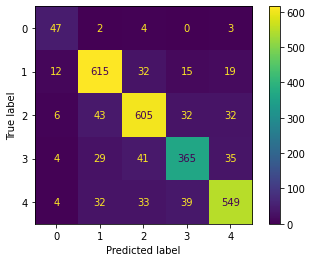

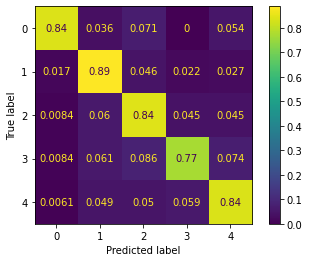

In [39]:
K_Fold_Validation(kdtree_5, X, Y)

k-fold mean error:   0.5422700877064172
k-fold mean score:   0.45772991229358284
	accuracy on class 0-th: 0.71429 %
	accuracy on class 1-th: 0.84416 %
	accuracy on class 2-th: 0.77019 %
	accuracy on class 3-th: 0.673 %
	accuracy on class 4-th: 0.77017 %


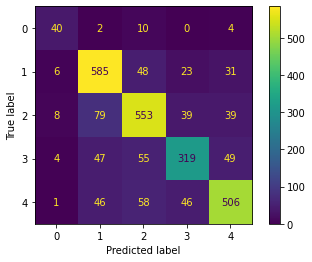

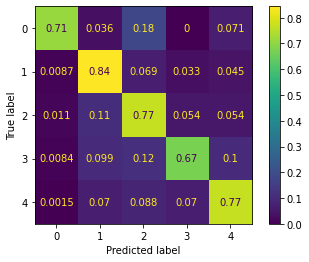

In [40]:
K_Fold_Validation(kdtree_10, X, Y)